In [1]:
# If necessary, set SPARK_HOME env variable
# %env SPARK_HOME=/opt/spark-2.4.3    
# %env SPARK_HOME=/home/pacha/spark-2.4.3-bin-hadoop2.7

import os
exec(open(os.path.join(os.environ["SPARK_HOME"], 'python/pyspark/shell.py')).read())

Welcome to
      ____              __
     / __/__  ___ _____/ /__
    _\ \/ _ \/ _ `/ __/  '_/
   /__ / .__/\_,_/_/ /_/\_\   version 2.4.1
      /_/

Using Python version 3.7.1 (default, Dec 14 2018 13:28:58)
SparkSession available as 'spark'.


### SparkSession - Entry point do DataFrame API
* SparkContext é o principal ponto de entrada para criar RDDs
* SparkSession provê um ponto único de entrasa para interagir com DataFrames Spark
* SparkSession é usado para criar DataFrame, registrar DataFrames e executar queries SQL
* SparkSession está disponível no PySpark shell como `spark`

In [37]:
sc

<SparkContext master=local[*] appName=pyspark-shell>

In [5]:
spark

### Criando DataFrames no PySpark
* Two different methods of creating DataFrames in PySpark
    * From existing RDDs using SparkSession's `createDataFrame()` method
* From various data sources (CSV, JSON, TXT) using SparkSession's read method
* Schema controls the data and helps DataFrames to optimize queries
* Schema provides information about column name, type of data in the column, empty values etc.,

In [6]:
iphones_RDD = sc.parallelize([
("XS", 2018, 5.65, 2.79, 6.24),
("XR", 2018, 5.94, 2.98, 6.84),
("X10", 2017, 5.65, 2.79, 6.13),
("8Plus", 2017, 6.23, 3.07, 7.12)
])
names = ['Model', 'Year', 'Height', 'Width', 'Weight']

In [7]:
iphones_df = spark.createDataFrame(iphones_RDD, schema=names)
type(iphones_df)

pyspark.sql.dataframe.DataFrame

### Criar um DataFrame a partir de CSV/JSON/TXT

In [8]:
df_csv = spark.read.csv("atp_matches_2018.csv", header=True, inferSchema=True)
#df_json = spark.read.json("file.json", header=True, inferSchema=True)
#df_txt = spark.read.txt("file.txt", header=True, inferSchema=True)

### Operações
#### Transformações e Ações
* Transformações:
`select()`, `filter()`, `groupby()`, `orderby()`, `dropDuplicates()` e `withColumnRenamed()`
* Ações:
`printSchema()`, `head()`, `show()`, `count()`, `columns()` e `describe()`

In [9]:
# printSchema() - imprime os tipos das colunas no DataFrame
df_csv.printSchema()

root
 |-- tourney_id: string (nullable = true)
 |-- tourney_name: string (nullable = true)
 |-- surface: string (nullable = true)
 |-- draw_size: string (nullable = true)
 |-- tourney_level: string (nullable = true)
 |-- tourney_date: integer (nullable = true)
 |-- match_num: integer (nullable = true)
 |-- winner_id: integer (nullable = true)
 |-- winner_seed: integer (nullable = true)
 |-- winner_entry: string (nullable = true)
 |-- winner_name: string (nullable = true)
 |-- winner_hand: string (nullable = true)
 |-- winner_ht: integer (nullable = true)
 |-- winner_ioc: string (nullable = true)
 |-- winner_age: double (nullable = true)
 |-- loser_id: integer (nullable = true)
 |-- loser_seed: integer (nullable = true)
 |-- loser_entry: string (nullable = true)
 |-- loser_name: string (nullable = true)
 |-- loser_hand: string (nullable = true)
 |-- loser_ht: integer (nullable = true)
 |-- loser_ioc: string (nullable = true)
 |-- loser_age: double (nullable = true)
 |-- score: string (n

In [15]:
# select()
df_w_age = df_csv.select('winner_age')

# show() - por padrão imprime as primeiras 20 linhas do dataframe
df_w_age.show(3)

+----------+
|winner_age|
+----------+
|     25.65|
|     21.23|
|     31.32|
+----------+
only showing top 3 rows



In [17]:
# filter() - filtra as linhas baseado em uma condição
df_w_age35 = df_w_age.filter(df_w_age.winner_age > 35)
df_w_age35.show(5)

+----------+
|winner_age|
+----------+
|     36.28|
|     35.77|
|     35.77|
|     35.77|
|      36.3|
+----------+
only showing top 5 rows



In [25]:
# groupby() - usado para agrupar uma variável
df_country_group = df_csv.groupby('winner_ioc')
df_country_group.count().show(5)

+----------+-----+
|winner_ioc|count|
+----------+-----+
|       POL|   12|
|       BRA|   18|
|       FRA|  252|
|       ALG|    3|
|       RSA|   50|
+----------+-----+
only showing top 5 rows



In [28]:
# orderBy()
df_country_group.count().orderBy('count', ascending=False).show(5)

+----------+-----+
|winner_ioc|count|
+----------+-----+
|       ESP|  256|
|       USA|  253|
|       FRA|  252|
|       GER|  187|
|       ARG|  170|
+----------+-----+
only showing top 5 rows



In [31]:
# withColumnRenamed() - renomeia uma coluna no DataFrame
df_country = df_csv.withColumnRenamed('winner_ioc', 'winner_country')
df_country.select('winner_country', 'winner_name').show(5)

+--------------+---------------+
|winner_country|    winner_name|
+--------------+---------------+
|           USA|  Ryan Harrison|
|           USA|Jared Donaldson|
|           UZB|  Denis Istomin|
|           AUS| Alex De Minaur|
|           USA|   Michael Mmoh|
+--------------+---------------+
only showing top 5 rows



In [34]:
# columns
df_country.columns

['tourney_id',
 'tourney_name',
 'surface',
 'draw_size',
 'tourney_level',
 'tourney_date',
 'match_num',
 'winner_id',
 'winner_seed',
 'winner_entry',
 'winner_name',
 'winner_hand',
 'winner_ht',
 'winner_country',
 'winner_age',
 'loser_id',
 'loser_seed',
 'loser_entry',
 'loser_name',
 'loser_hand',
 'loser_ht',
 'loser_ioc',
 'loser_age',
 'score',
 'best_of',
 'round',
 'minutes',
 'w_ace',
 'w_df',
 'w_svpt',
 'w_1stIn',
 'w_1stWon',
 'w_2ndWon',
 'w_SvGms',
 'w_bpSaved',
 'w_bpFaced',
 'l_ace',
 'l_df',
 'l_svpt',
 'l_1stIn',
 'l_1stWon',
 'l_2ndWon',
 'l_SvGms',
 'l_bpSaved',
 'l_bpFaced',
 'winner_rank',
 'winner_rank_points',
 'loser_rank',
 'loser_rank_points']

In [36]:
# describe() - mostra as principais estatísticas dos campos numéricos no DataFrame
df_country.select('winner_name', 'winner_country', 'winner_age', 'w_ace').describe().show()

+-------+-------------+--------------+------------------+------------------+
|summary|  winner_name|winner_country|        winner_age|             w_ace|
+-------+-------------+--------------+------------------+------------------+
|  count|         2889|          2889|              2889|              2863|
|   mean|         null|          null|27.603336794738638|7.4917918267551515|
| stddev|         null|          null| 4.676314842923329|  5.98733689068876|
|    min|Adam Pavlasek|           ALG|             14.94|                 0|
|    max|Zsombor Piros|           ZIM|             39.38|                64|
+-------+-------------+--------------+------------------+------------------+



## Executando queries SQL diretamente

* O método `sql()` do SparkSession executa uma query SQL
* O método `sql()` recebe uma declaração SQL como parâmetro e retorna um DataFrame 

In [38]:
df_csv.createOrReplaceTempView("atp_matches")

In [39]:
df2 = spark.sql("SELECT winner_name, loser_name FROM atp_matches")
df2.collect()

[Row(winner_name='Ryan Harrison', loser_name='Leonardo Mayer'),
 Row(winner_name='Jared Donaldson', loser_name='Jordan Thompson'),
 Row(winner_name='Denis Istomin', loser_name='Damir Dzumhur'),
 Row(winner_name='Alex De Minaur', loser_name='Steve Johnson'),
 Row(winner_name='Michael Mmoh', loser_name='Federico Delbonis'),
 Row(winner_name='Mischa Zverev', loser_name='John Patrick Smith'),
 Row(winner_name='Alexandr Dolgopolov', loser_name='Diego Sebastian Schwartzman'),
 Row(winner_name='Horacio Zeballos', loser_name='Ernesto Escobedo'),
 Row(winner_name='Matthew Ebden', loser_name='Francis Tiafoe'),
 Row(winner_name='Hyeon Chung', loser_name='Gilles Muller'),
 Row(winner_name='Kyle Edmund', loser_name='Denis Shapovalov'),
 Row(winner_name='John Millman', loser_name='Peter Polansky'),
 Row(winner_name='Ryan Harrison', loser_name='Yannick Hanfmann'),
 Row(winner_name='Denis Istomin', loser_name='Jared Donaldson'),
 Row(winner_name='Alex De Minaur', loser_name='Milos Raonic'),
 Row(winne

In [41]:
# Extraindo dados
query = '''SELECT tourney_name FROM atp_matches'''
df_tourney = spark.sql(query)
df_tourney.show(5)

+------------+
|tourney_name|
+------------+
|    Brisbane|
|    Brisbane|
|    Brisbane|
|    Brisbane|
|    Brisbane|
+------------+
only showing top 5 rows



In [45]:
# Agrupamentos e Ordenação
query = '''SELECT winner_name, count(*) FROM atp_matches GROUP BY winner_name ORDER BY count(*) DESC'''
spark.sql(query).show(10)

+--------------------+--------+
|         winner_name|count(1)|
+--------------------+--------+
|    Alexander Zverev|      58|
|       Dominic Thiem|      54|
|      Novak Djokovic|      53|
|       Roger Federer|      49|
|Juan Martin Del P...|      48|
|      Kevin Anderson|      48|
|       Fabio Fognini|      47|
|  Stefanos Tsitsipas|      46|
|        Rafael Nadal|      45|
|         Marin Cilic|      45|
+--------------------+--------+
only showing top 10 rows



In [53]:
# Filtros
query = '''SELECT winner_name, surface, count(*) FROM atp_matches 
           WHERE surface = 'Grass' GROUP BY winner_name, surface 
           ORDER BY count(*) DESC'''
spark.sql(query).show(10)

+----------------+-------+--------+
|     winner_name|surface|count(1)|
+----------------+-------+--------+
|   Roger Federer|  Grass|      12|
|  Novak Djokovic|  Grass|      11|
|Adrian Mannarino|  Grass|       9|
|    Milos Raonic|  Grass|       9|
|   Matthew Ebden|  Grass|       7|
|    Nick Kyrgios|  Grass|       7|
|   Jeremy Chardy|  Grass|       7|
|   Mischa Zverev|  Grass|       6|
|  Kevin Anderson|  Grass|       6|
|     Jiri Vesely|  Grass|       6|
+----------------+-------+--------+
only showing top 10 rows



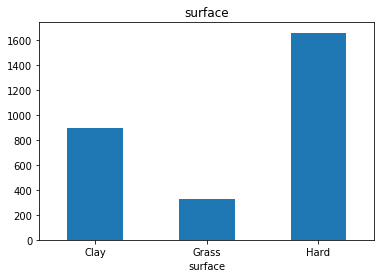

In [59]:
# Visualizando com handyspark

%matplotlib inline
from handyspark import *
import matplotlib.pyplot as plt

hdf = df_csv.toHandy()
plt.show(hdf.cols["surface"].hist())